# Scaling and Viz Demo

1. Compare various scaling methods and their outputs
1. Visualize avg mpg vs avg weight by origin
1. Same as above, but scaled

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler

def various_scales(s: pd.Series) -> pd.DataFrame:
    df = pd.DataFrame()
    df['original'] = s
    df['min_max'] = MinMaxScaler().fit_transform(s.values.reshape(-1, 1))
    df['z_score'] = StandardScaler().fit_transform(s.values.reshape(-1, 1))
    df['quantile(inclusive)'] = s.rank(pct=True, method='first')
    df['quantile(exclusive)'] = QuantileTransformer().fit_transform(s.values.reshape(-1, 1))
    df['rank'] = s.rank()
    return df.set_index('original')

In [10]:
x1 = pd.Series([1, 2, 3, 3, 4, 5])
x2 = pd.Series([1, 8, 9, 10, 20, 100])


various_scales(x2)

,min_max,z_score,quantile(inclusive),quantile(exclusive),rank
original,,,,,
1,0.00,-0.69,0.17,0.00,1.00
8,0.07,-0.49,0.33,0.20,2.00
9,0.08,-0.46,0.50,0.40,3.00
10,0.09,-0.43,0.67,0.60,4.00
20,0.19,-0.14,0.83,0.80,5.00
100,1.00,2.21,1.00,1.00,6.00


In [3]:
cars = pd.read_csv('cars.csv')
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.00,8,307.00,130.00,3504,12.00,1970-01-01,USA
1,buick skylark 320,15.00,8,350.00,165.00,3693,11.50,1970-01-01,USA
2,plymouth satellite,18.00,8,318.00,150.00,3436,11.00,1970-01-01,USA
3,amc rebel sst,16.00,8,304.00,150.00,3433,12.00,1970-01-01,USA
4,ford torino,17.00,8,302.00,140.00,3449,10.50,1970-01-01,USA


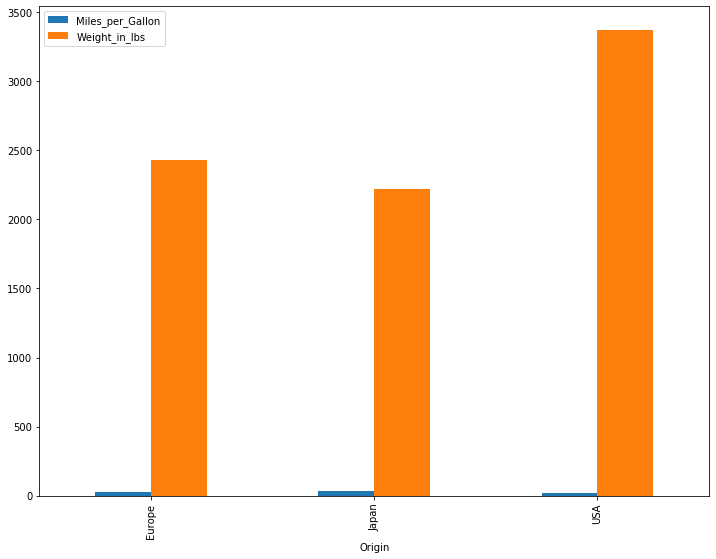

In [13]:
cars.groupby('Origin')[['Miles_per_Gallon', 'Weight_in_lbs']].mean().plot.bar(figsize=(12, 9))

In [14]:
scaler = StandardScaler()
scaler.fit(cars[['Weight_in_lbs', 'Miles_per_Gallon']])
scaler.transform(cars[['Weight_in_lbs', 'Miles_per_Gallon']])

array([[ 6.20107156e-01, -7.06438701e-01],
       [ 8.43521822e-01, -1.09075062e+00],
       [ 5.39725159e-01, -7.06438701e-01],
       [ 5.36178895e-01, -9.62646649e-01],
       [ 5.55092306e-01, -8.34542675e-01],
       [ 1.60951496e+00, -1.09075062e+00],
       [ 1.62488211e+00, -1.21885460e+00],
       [ 1.57523441e+00, -1.21885460e+00],
       [ 1.70881037e+00, -1.21885460e+00],
       [ 1.02910967e+00, -1.09075062e+00],
       [ 1.30722648e-01,             nan],
       [ 1.37427942e+00,             nan],
       [ 1.24661389e+00,             nan],
       [ 1.40264953e+00,             nan],
       [ 1.02910967e+00,             nan],
       [ 6.89850359e-01, -1.09075062e+00],
       [ 7.44226415e-01, -1.21885460e+00],
       [ 4.41611840e-01,             nan],
       [ 9.23903819e-01, -1.09075062e+00],
       [ 1.25994296e-01, -1.21885460e+00],
       [-7.18016667e-01,  6.21851453e-02],
       [-1.73074015e-01, -1.94022803e-01],
       [-2.42817217e-01, -7.06438701e-01],
       [-4.

In [17]:
scaled_data = StandardScaler().fit_transform(cars[['Weight_in_lbs', 'Miles_per_Gallon']])
cars['z_weight'] = scaled_data[:, 0]
cars['z_mpg'] = scaled_data[:, 1]

Text(0, 0.5, 'Mean Z-Score')

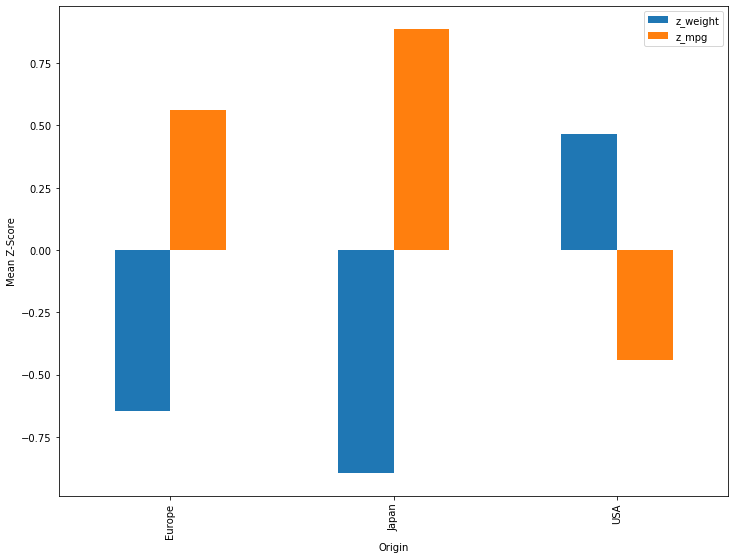

In [20]:
cars.groupby('Origin')[['z_weight', 'z_mpg']].mean().plot.bar(figsize=(12, 9))jb
plt.ylabel('Mean Z-Score')

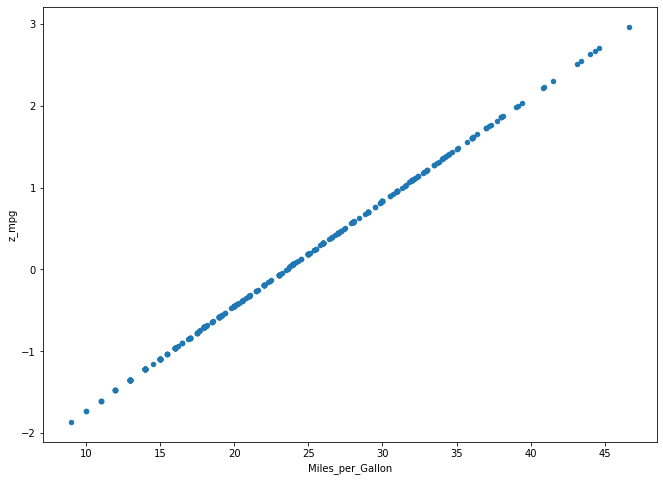

In [23]:
cars.plot.scatter(x='Miles_per_Gallon', y='z_mpg', figsize=(11, 8))

In [21]:
cars.groupby('Origin')[['z_weight', 'z_mpg']].agg(['mean', 'count'])

z_weight       z_mpg      
           mean count  mean count
Origin                           
Europe    -0.65    73  0.56    70
Japan     -0.90    79  0.89    79
USA        0.46   254 -0.44   249